In [1]:
from profiler.core import *

In [2]:
pf = Profiler(workers = 2, tol=1e-6, eps=0.05, embedtxt=True)

In [3]:
pf.session.load_data(name='thoraric', src=FILE, fpath='./hce_data/thoraric/thoraric.csv', check_param=True, na_values='empty')

INFO:profiler.utility:[0.008378267288208008] Load Data start

INFO:profiler.data.dataset:parameters used for data loading:
 {'na_values': 'empty', 'sep': ',', 'header': 'infer', 'dropcol': None, 'dropna': False, 'encoding': 'utf-8', 'normalize': True, 'min_categories_for_embedding': 10}
INFO:profiler.data.dataset:inferred types of attributes: {
    "dgn": "categorical",
    "pre4": "numeric",
    "pre5": "numeric",
    "pre6": "categorical",
    "pre7": "categorical",
    "pre8": "categorical",
    "pre9": "categorical",
    "pre10": "categorical",
    "pre11": "categorical",
    "pre14": "categorical",
    "pre17": "categorical",
    "pre19": "categorical",
    "pre25": "categorical",
    "pre30": "categorical",
    "pre32": "categorical",
    "age": "numeric",
    "risk1yr": "categorical"
}
INFO:profiler.data.dataset:(possible types: numeric, categorical, text, date)
INFO:profiler.data.dataset:inferred operators of attributes: {'dgn': ['equal'], 'pre4': ['equal'], 'pre5': ['equal'], 

In [4]:
pf.session.load_training_data(multiplier = None)

INFO:profiler.utility:[0.06309366226196289] Create Training Data start

INFO:profiler.data.transformer:needs multiplier = 21 to bound the error in inv cov estimation <= 0.05000000
INFO:profiler.data.transformer:use multiplier = 21, and the bound is 0.00122002
INFO:profiler.data.transformer:Draw Pairs
100%|██████████| 17/17 [00:00<00:00, 299.42it/s]
INFO:profiler.data.transformer:Number of training samples: 15980
INFO:profiler.data.transformer:Computing Differences
INFO:profiler.data.transformer:estimated missing data probability in training data is 0.0000
INFO:profiler.utility:[0.3567326068878174] Create Training Data execution time: 0.2936389446258545



In [5]:
# set sparsity to 0 for exp_reproduce 
autoregress_matrix = pf.session.learn_structure(sparsity=0, infer_order=True)

INFO:profiler.utility:[0.3623542785644531] Learn Structure start

INFO:profiler.learner:use threshold 1.1800
INFO:profiler.utility:[0.4708750247955322] Learn Structure execution time: 0.1085207462310791



In [6]:
parent_sets = pf.session.get_dependencies(score="fit_error")

INFO:profiler.utility:[0.47595977783203125] Get Dependencies start

INFO:profiler.utility:[0.511044979095459] Get Dependencies execution time: 0.035085201263427734



pre4 -> pre5 (0.011562037100898356)
pre6 -> pre10 (0.18377753195083366)
pre7 -> pre8 (0.1799113049479995)
pre9 -> pre25 (0.03240784184787687)
pre11 -> pre19 (0.008405893336290658)


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


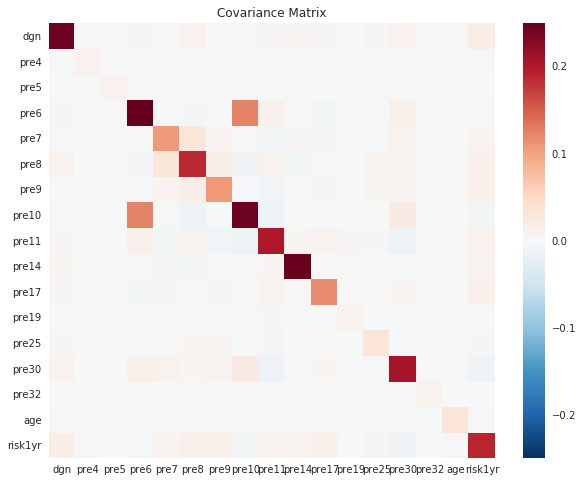

In [7]:
pf.session.visualize_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


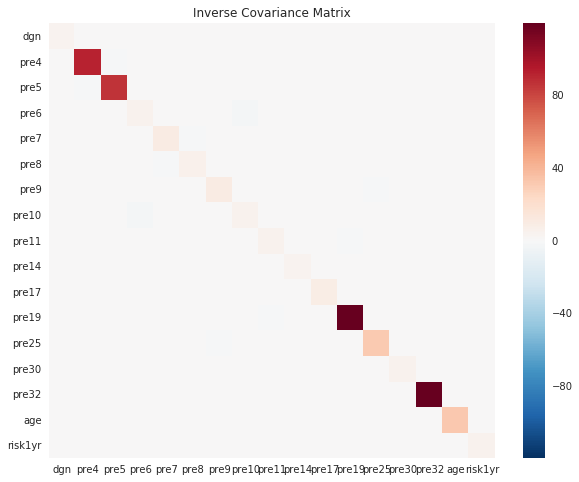

threshold =  34
sum =  [0.         1.4883544  1.4883544  2.75641134 1.55790113 1.55790113
 1.46580335 2.75641134 1.6192397  0.         0.         1.6192397
 1.46580335 0.         0.         0.         0.        ]
attr =  Index(['dgn', 'pre4', 'pre5', 'pre6', 'pre7', 'pre8', 'pre9', 'pre10', 'pre11',
       'pre14', 'pre17', 'pre19', 'pre25', 'pre30', 'pre32', 'age', 'risk1yr'],
      dtype='object')
Attr w/o dependency: 
 Index([['dgn'], ['pre4'], ['pre5'], ['pre6'], ['pre7'], ['pre8'], ['pre9'],
       ['pre10'], ['pre11'], ['pre14'], ['pre17'], ['pre19'], ['pre25'],
       ['pre30'], ['pre32'], ['age'], ['risk1yr']],
      dtype='object')


Attr w/ dependency: 
 Index([], dtype='object')


In [8]:
pf.session.visualize_inverse_covariance()

In [9]:
pf.session.timer.get_stat()

,time_point,msg,execution_time
0,0.008378,start: Load Data,0.000000
1,0.057725,end: Load Data,0.049347
2,0.063094,start: Create Training Data,0.000000
3,0.356733,end: Create Training Data,0.293639
4,0.362354,start: Learn Structure,0.000000
5,0.470875,end: Learn Structure,0.108521
6,0.475960,start: Get Dependencies,0.000000
7,0.511045,end: Get Dependencies,0.035085
8,0.511045,total_execution_time,0.486592


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


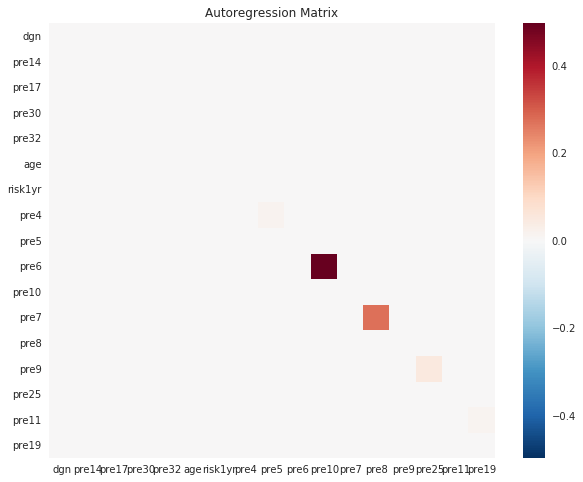

In [10]:
pf.session.visualize_autoregression()

In [11]:
pf.session.timer.to_csv()

##### 